## Bayesian A/B Testing

**Ming He**
**(03-01-2018)**

Taking conversion as an example. In frequentist approach, we treat population conversion rate as a fixed value, and use LLN to estimate it. Then we compare two population means. In Bayesian approach, we treat the conversion rate as a random variable that has some prior distribution (before conducting the experiment). 

After the experiment, we have two samples, one from control group, one from experiment group. For each of them, we use the sample to update the prior distribution. After getting two posterior distributions, we compare them to see which one has more desired result.

In [74]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In studying conversion rate, which is modeled as a random variable distributed on $[0,1]$, we usually use beta distribution, denoted as $beta(\alpha,\beta)$. 

* $beta(1,1)$ is uniform
* $\alpha$ is the number of conversions, $\beta$ represents number of not conversions.

In [63]:
n = 4000 #number of coin flips

control, experiment = np.random.rand(2,n)

c_threshold, e_threshold = 0.16, 0.17

c_success, e_success = sum(control<c_threshold), sum(experiment<e_threshold)

c_failure, e_failure = n-c_success, n-e_success

prior_success = 8
prior_failure = 42

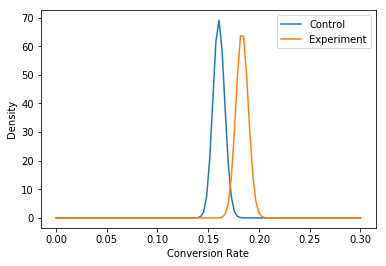

In [64]:
plt.figure(figsize=(6,4))
# Control
c_alpha, c_beta = c_success+prior_success, c_failure+prior_failure

# Experiment
e_alpha, e_beta = e_success+prior_success, e_failure+prior_failure

x = np.linspace(0,0.3,100)

# Generate and plot the distributions
c_dist = beta(c_alpha,c_beta)
e_dist = beta(e_alpha,e_beta)

plt.plot(x,c_dist.pdf(x),label = 'Control')
plt.plot(x,e_dist.pdf(x),label ='Experiment')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

**Comments**

* Comparing the two distributions is similar to comparing the two estimated means in the frequentist approach.

### Posterior Mean Comparison

In [67]:
np.round(c_dist.mean(),3), np.round(e_dist.mean(),3)

(0.16, 0.183)

In [44]:
c_dist.ppf([0.025, 0.5, 0.975])

array([0.11146545, 0.17786183, 0.26063892])

### P-ish Value

It measures that if I draw many random variables from both distributions, what is the percentage of pairs for which the one from control posterior distribution is greater than the one from experiment distribution.

In [65]:
sample_size = 10000
c_samples = np.array([c_dist.rvs() for _ in range(sample_size)])
e_samples = np.array([e_dist.rvs() for _ in range(sample_size)])
p_ish_value = np.mean(1*(c_samples>e_samples))
p_ish_value

0.0035

### Frequency of Ratio between Experiment and Control

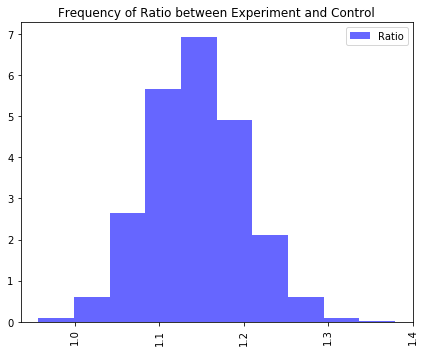

In [73]:
ratio = e_samples/c_samples

fig = plt.figure()
fig.set_size_inches(6, 5)

ax = fig.add_subplot(1,1,1)
ax.hist(ratio, label = 'Ratio', normed = True, alpha=0.6, color= 'blue')
plt.xticks(rotation='vertical')
ax.set_title('Frequency of Ratio between Experiment and Control')

plt.tight_layout()
plt.legend(prop={'size': 10})
plt.show()

### Different Beta Distributions

The following graph illustrates that for the same ratio, if two numbers are larger, then the prior is stronger.

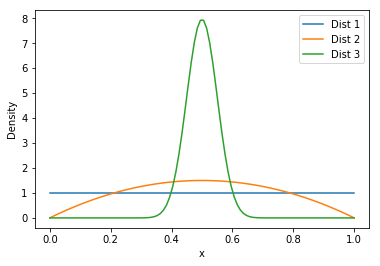

In [78]:
x = np.linspace(0,1,100)

# Generate and plot the distributions
dist_1 = beta(1,1)
dist_2 = beta(2,2)
dist_3 = beta(50,50)

plt.plot(x,dist_1.pdf(x),label = 'Dist 1')
plt.plot(x,dist_2.pdf(x),label = 'Dist 2')
plt.plot(x,dist_3.pdf(x),label = 'Dist 3')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()